# Description of the final project

## Introduction

In this project, you are going to work with the dataset based on the census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. Your goal is to predict level of income of a person: "- 50000" (means less than \$50k/year) or "50000+" (means more than \$50k/year). The data is split into train (`train.csv`) and test (`test.csv`) parts. You should use train part to train the models, and test part to estimate their final quality. The best quality on the test dataset should be your final result.

The description of the data is available here: https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

_Citation:_

* _Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._

## Detailed Task Description

The solution should have the following parts:

### [25%] 1. Data exploration

* 1.1. (8%) Which metric are you going to use to evaluate the performance of the model and why?
* 1.2. (8%) Which validation strategy are you going to use and why? Apply it to the data on the preprocessing step
* 1.3. (9%) Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions

### [25%] 2. Data preprocessing

* 2.1. (8%) Fill missing values (if there are any)
* 2.2. (9%) Properly encode categorical features. Explain your choice of methods of categorical feature encoding
* 2.3. (8%) Cluster observations and add cluster number as one of the features. Make sure that the clustering method has a good quality

### [25%] 3. Model training

* 3.1. (8%) Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)
* 3.2. (9%) Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models
* 3.3. (8%) Perform blending or stacking of the trained machine learning algorithms. Carefully tune the weights of the ensemble

### [25%] 4. Summary

* 4.1. (8%) Estimate the quality of the models and their ensemble on the test set. Describe the results. Which model is the best?
* 4.2. (8%) Interpret the best single model and the ensemble. Use at least 2 model interpretation techniques. Explain, why your models have good quality (or bad quality)
* 4.3. (9%) Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

### General Requirements

* You should provide a solution in the form of the Jupyter Notebook with code cells and markdown cells (with text)
* Make sure that the instructor can run all the cells to reproduce your results
* Clearly answer each question, perform the required actions from the task. Explain your decisions if you choose to use some techniques
* Support all your statements with calculations and plots. For instance, if you claim that the dataset does not have missing values, you need to provide the code which shows that the total number of missing values is zero

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## 1. Data Exploration
1.1. (8%) Which metric are you going to use to evaluate the performance of the model and why?

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Explore target variable.

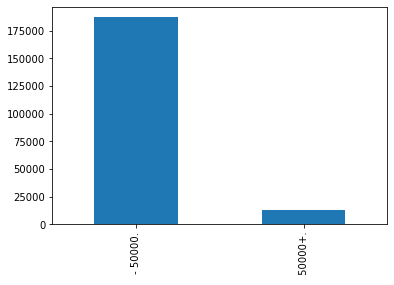

In [3]:
train['target'].value_counts().plot(kind = 'bar');

In [4]:
train['target'].value_counts()/(train.shape[0])

 - 50000.    0.937942
 50000+.     0.062058
Name: target, dtype: float64

About 6% of people in this data have annual income more than 50000. The data is imbalanced. The number of true positives is quite small, because they are in the minority. Number of false positives is small because they are in the minority. The number of true negative is large. The number of false negatives is also large. Our data mostly consists of negative classes, so the postive/negative ratio will be small.

Since the data is imbalanced. We will get a result with high precision and low recall. We will use f1 score to harmonize precision and recall.

1.2. (8%) Which validation strategy are you going to use and why? Apply it to the data on the preprocessing step

We are going to use kfold(3) cross validation strategy. We want to ensure every observation has a chance to appear in the training and validation set. Here we use KfoldStratified to keep the percentage of classes for each sample. We split data into train and val so the test data will be completely unseen. 

1.3. (9%) Explore which features do you have, what is their distribution and connection to the target. Perform feature selection techniques such as PCA, and feature engineering, if necessary. Explain your decisions

### Explore numerical variables.

In [5]:
num_cols = train.columns[np.logical_or(train.dtypes == "int64", train.dtypes == "float64")].tolist() #
print(num_cols)

['AAGE', 'ADTIND', 'ADTOCC', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'NOEMP', 'SEOTR', 'VETYN', 'WKSWORK']


Distribution of numerical features:


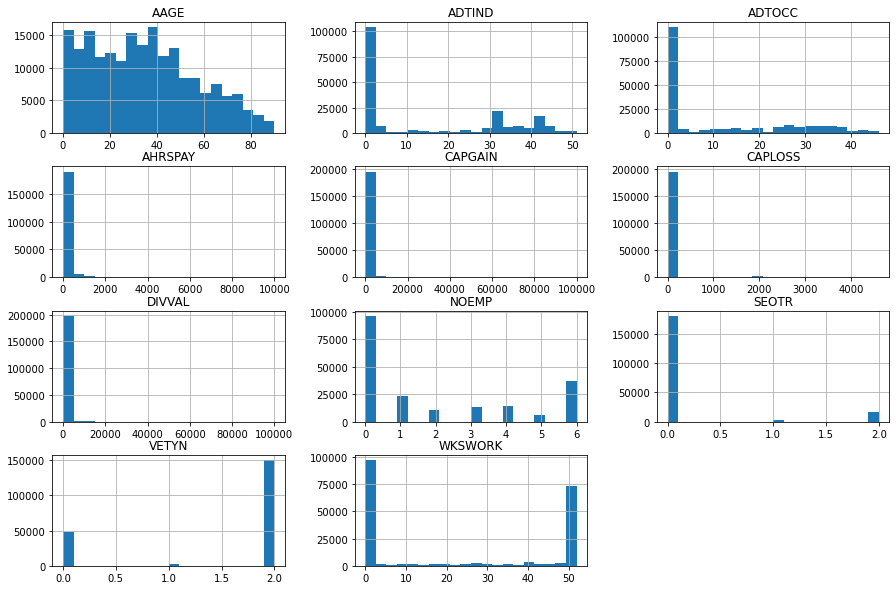

In [6]:
print("Distribution of numerical features:")
train[num_cols].hist(bins=20, grid=True, figsize=(15, 10), layout=(4, 3))
plt.show()

We notice hat 'SEOTR' only has three unique values.

'AAGE' (Age) is a normal distribution but skewed to the left. 

In [7]:
cat_cols = train.columns[train.dtypes == "object"].tolist()
print(cat_cols)

['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA', 'target']


Distribution of categorical features:


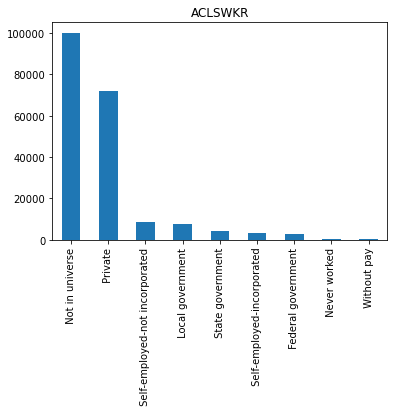

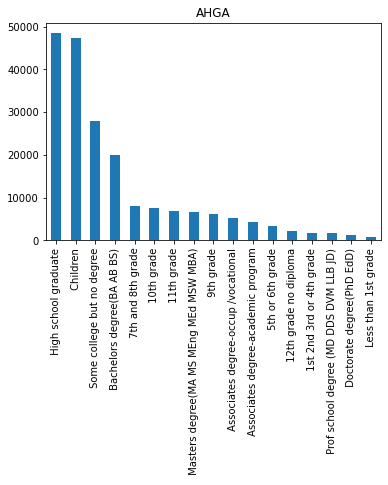

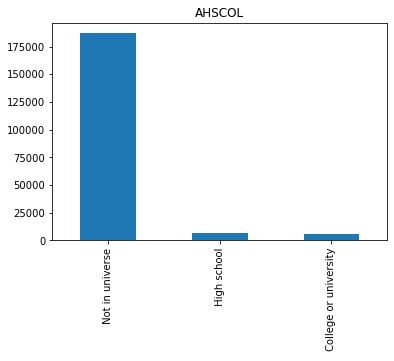

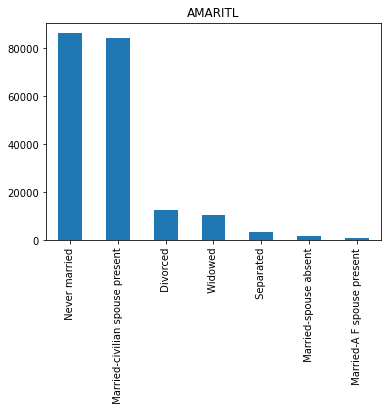

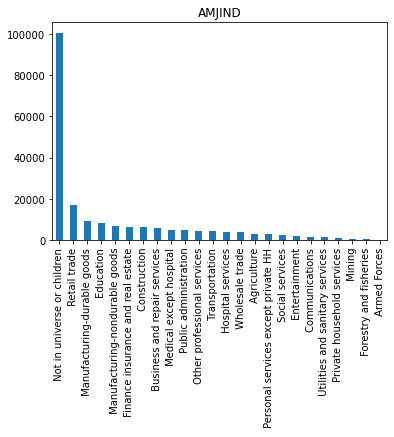

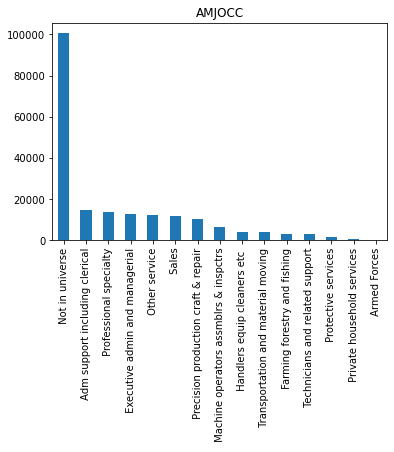

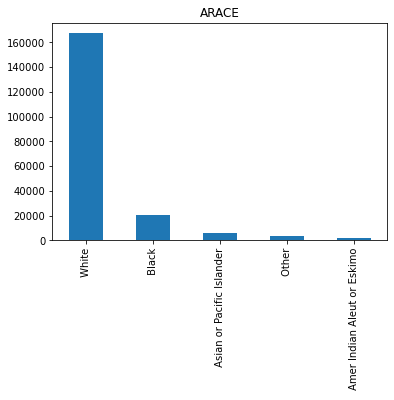

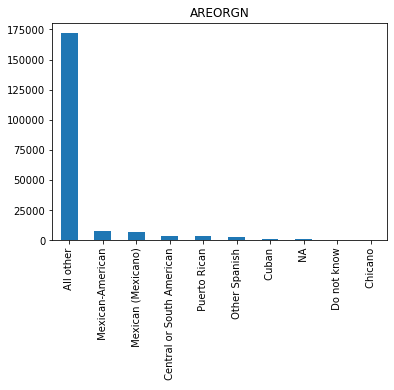

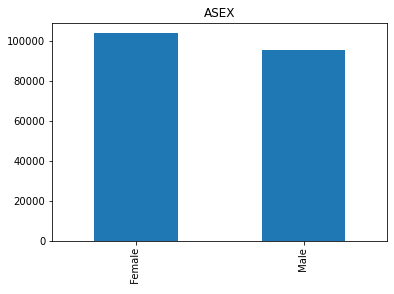

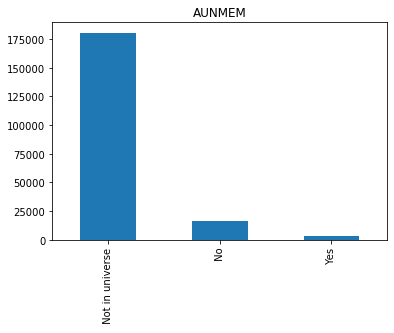

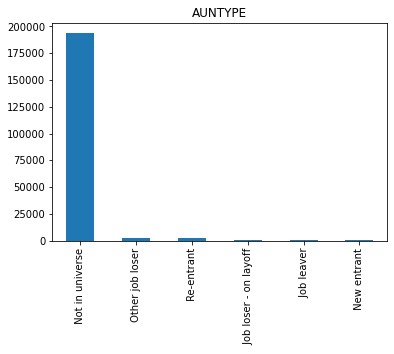

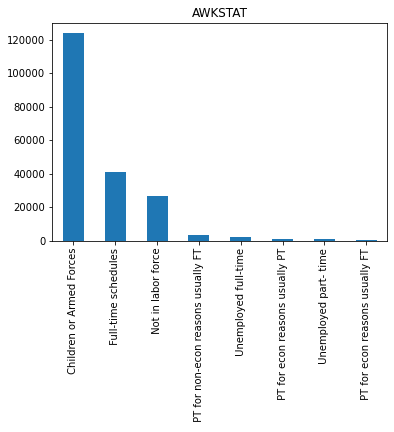

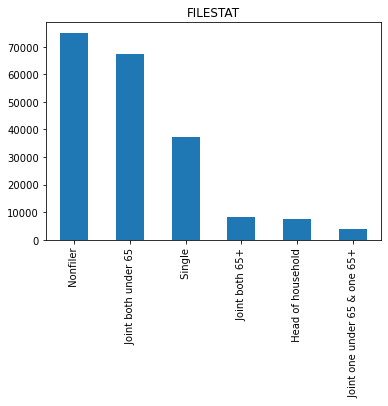

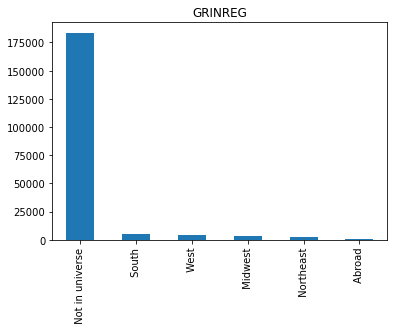

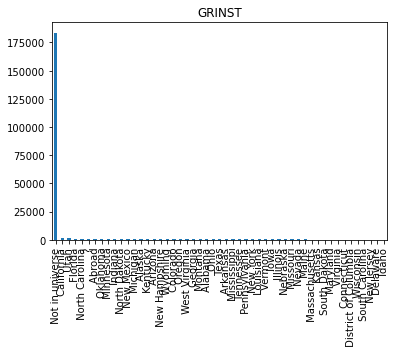

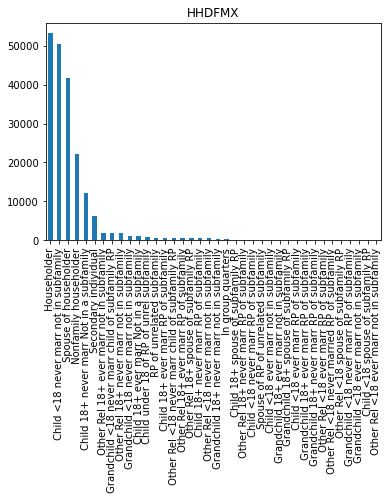

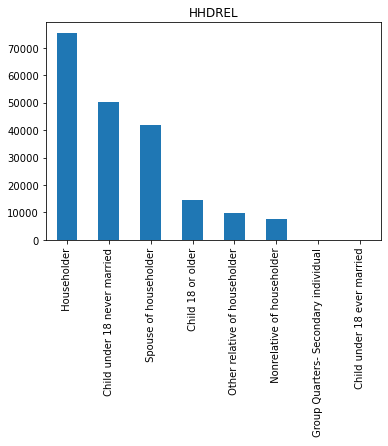

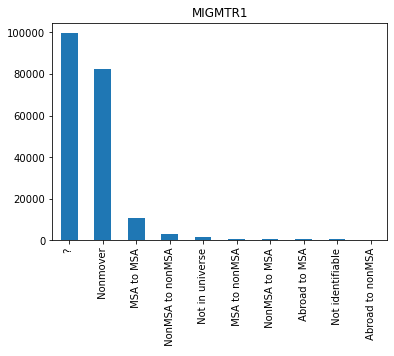

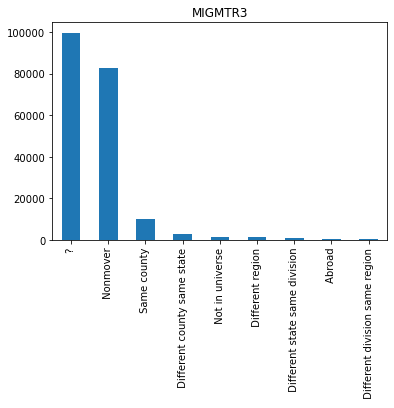

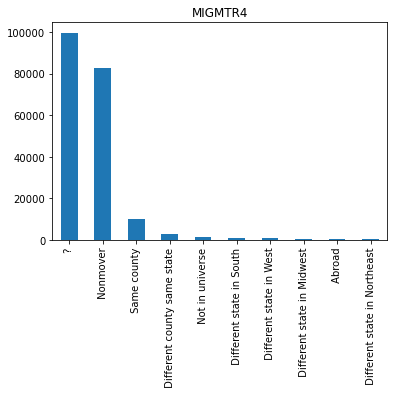

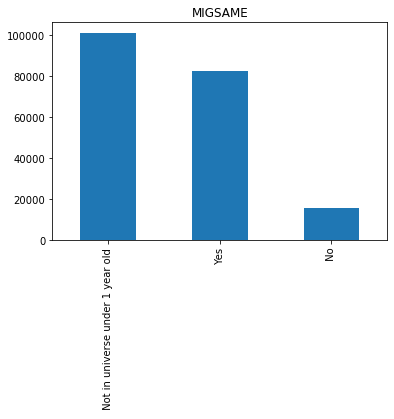

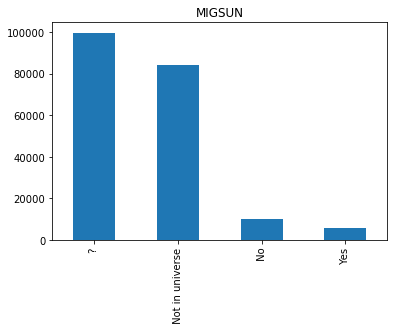

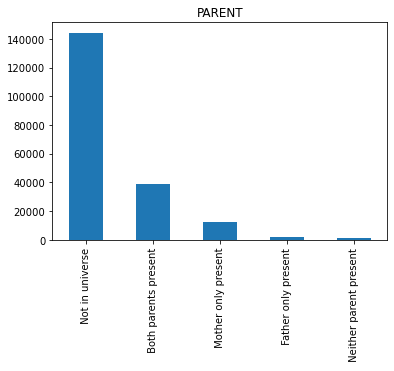

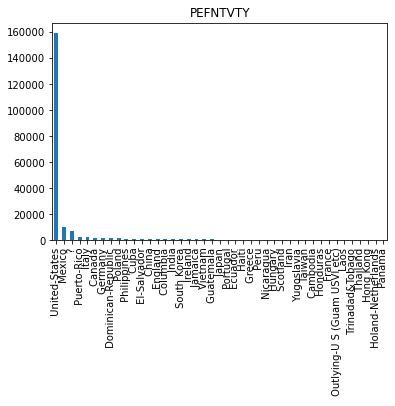

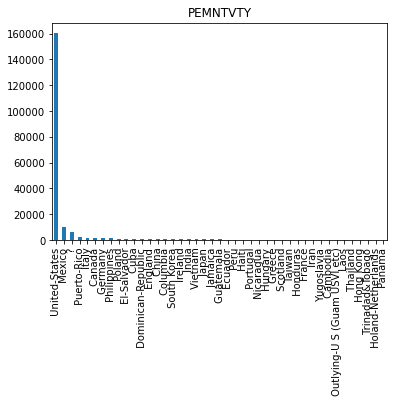

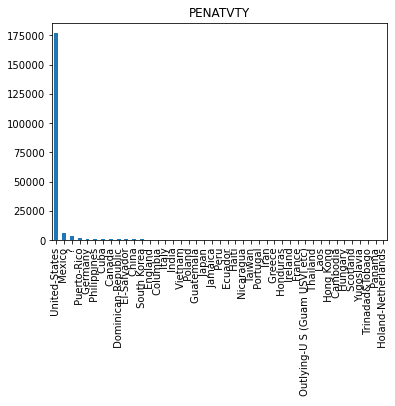

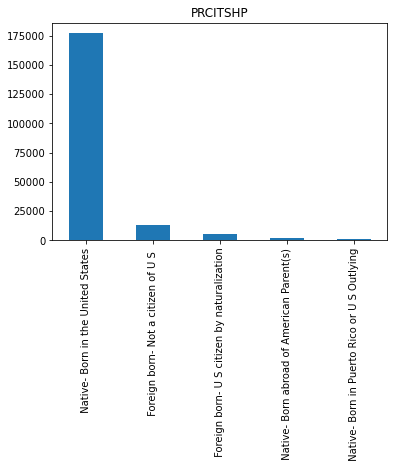

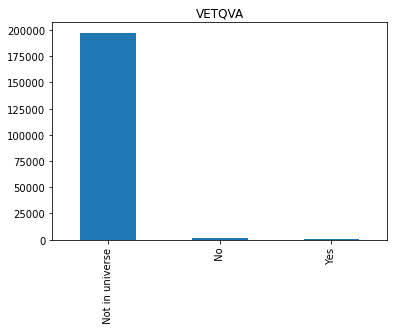

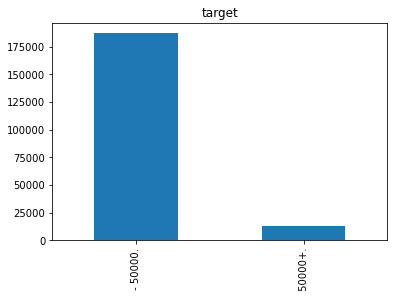

In [8]:
print("Distribution of categorical features:")
for col in cat_cols:
    plt.figure()
    plt.title(col)
    train[col].value_counts().plot.bar()

In [9]:
train[cat_cols].describe(include='object')

,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,MIGMTR4,MIGSAME,MIGSUN,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,VETQVA,target
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,...,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,9,17,3,7,24,15,5,10,2,3,...,10,3,4,5,43,43,43,5,3,2
top,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
freq,100245,48407,186943,86485,100684,100684,167365,171907,103984,180459,...,99696,101212,99696,144232,159163,160479,176989,176992,197539,187141


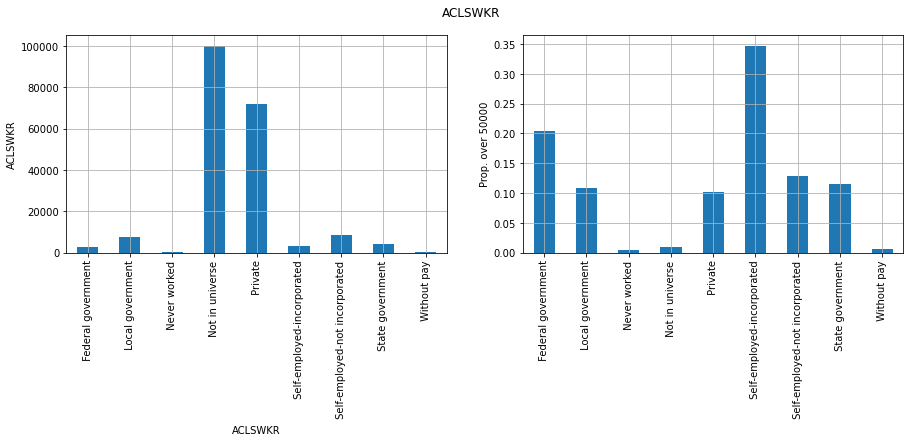

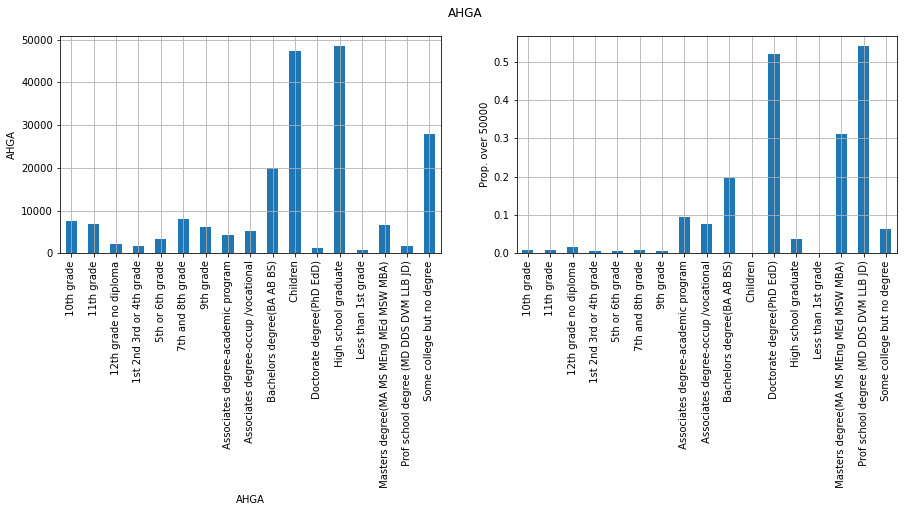

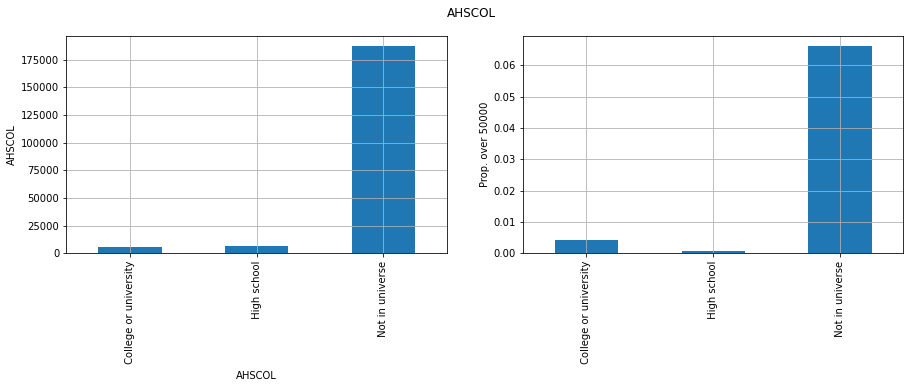

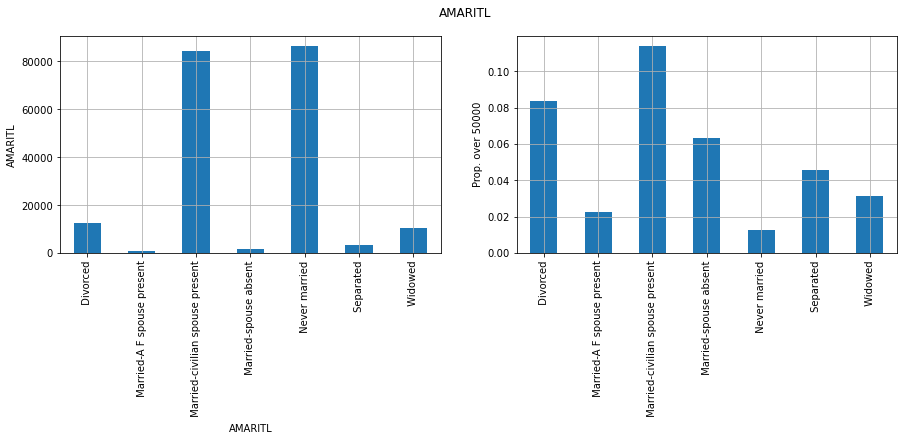

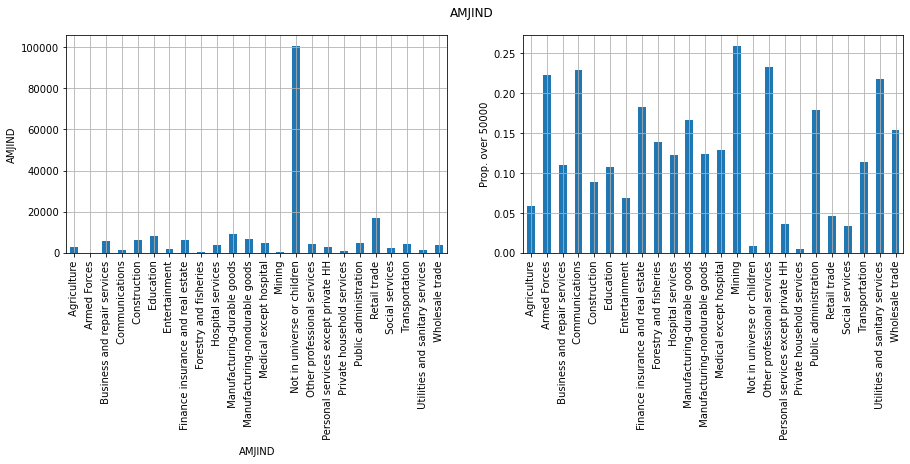

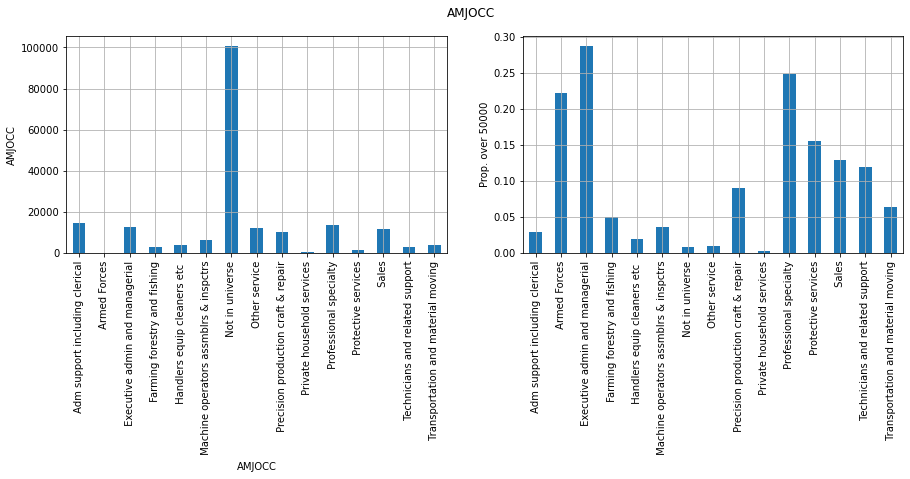

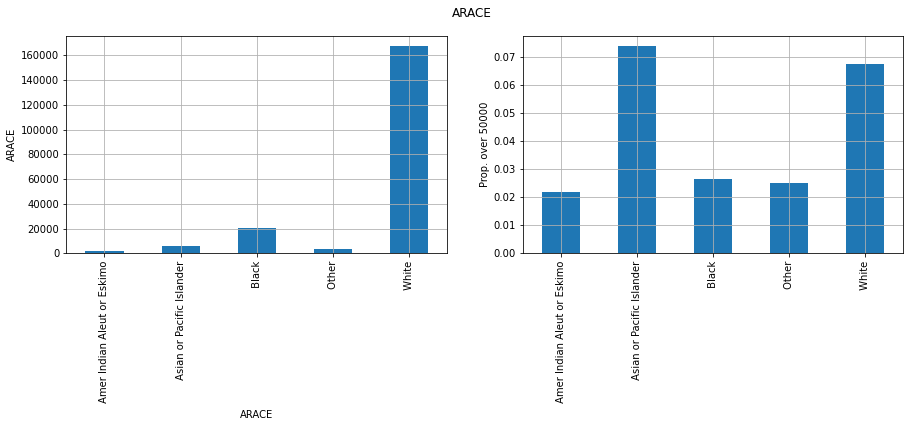

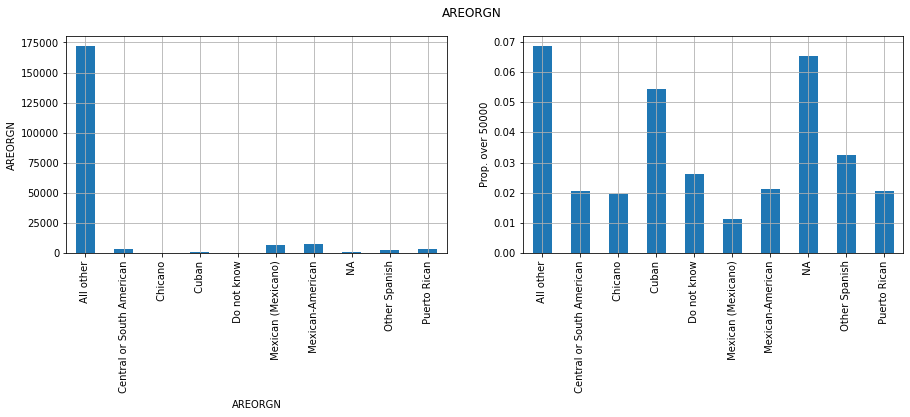

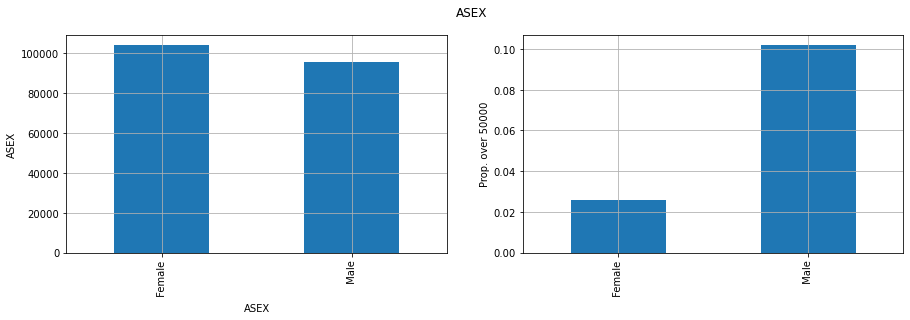

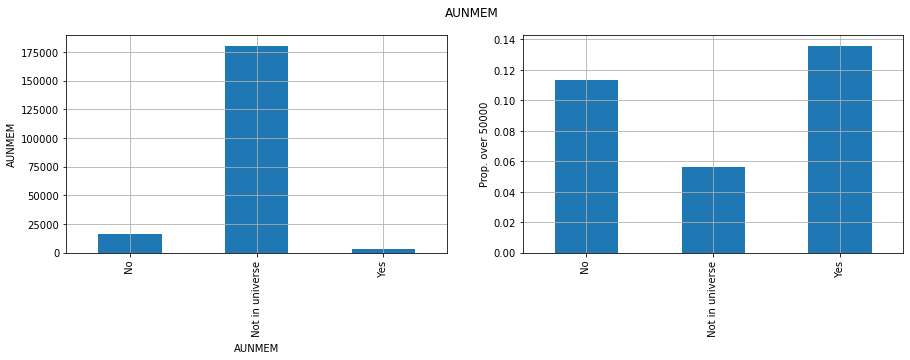

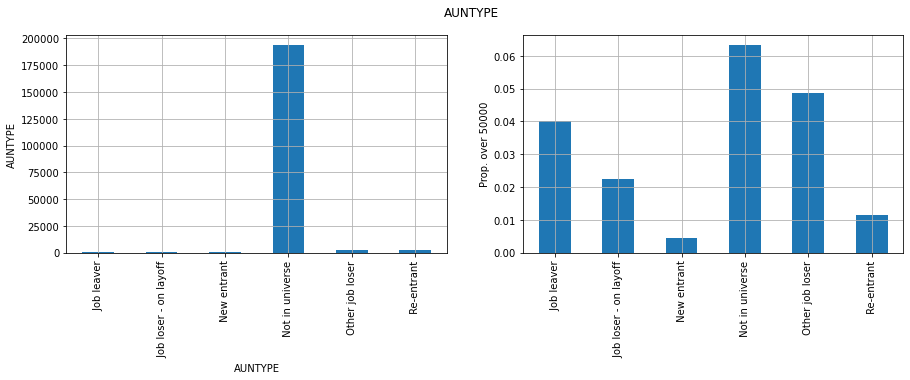

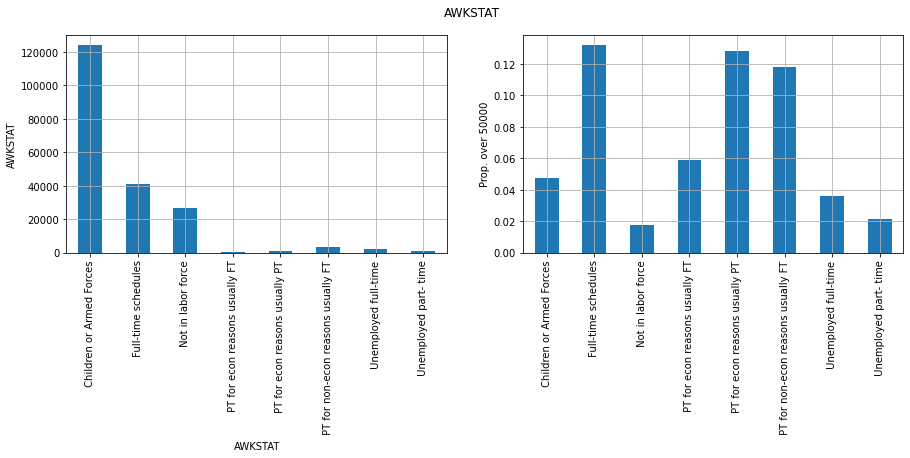

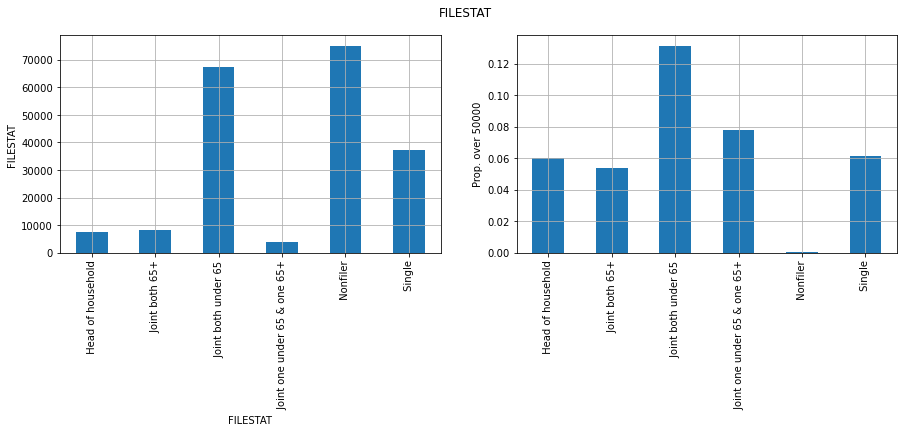

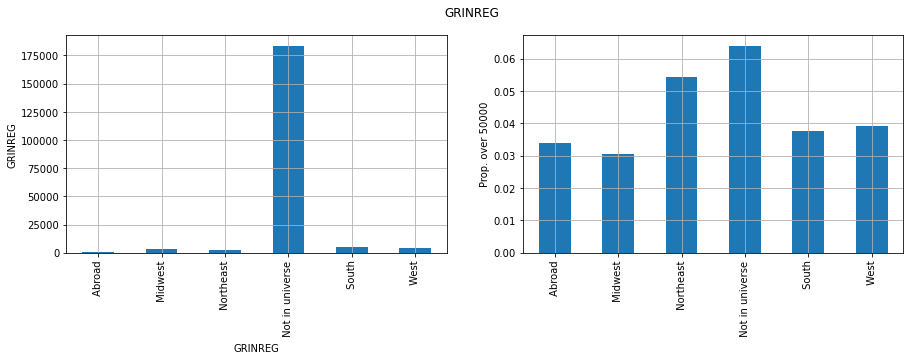

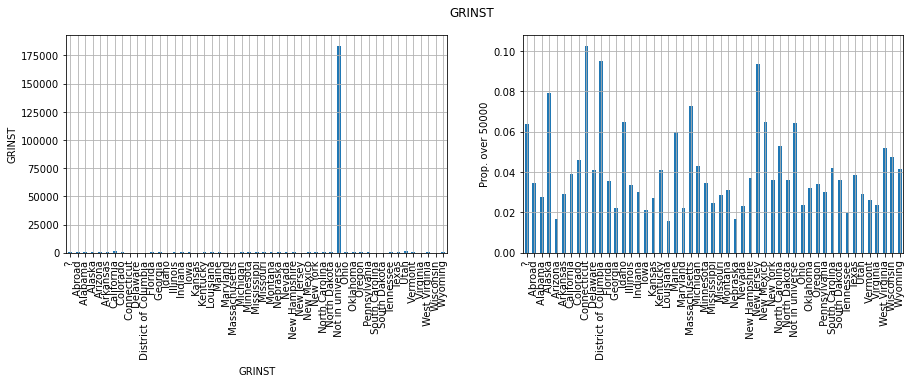

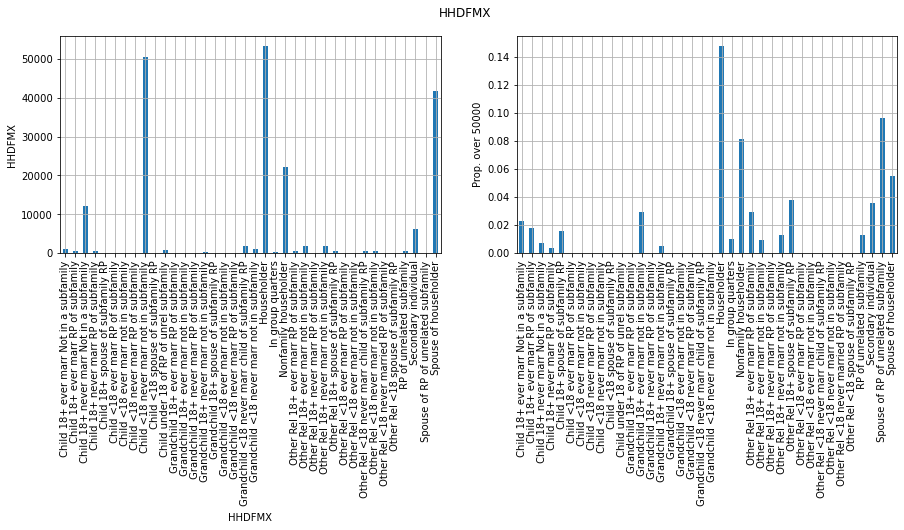

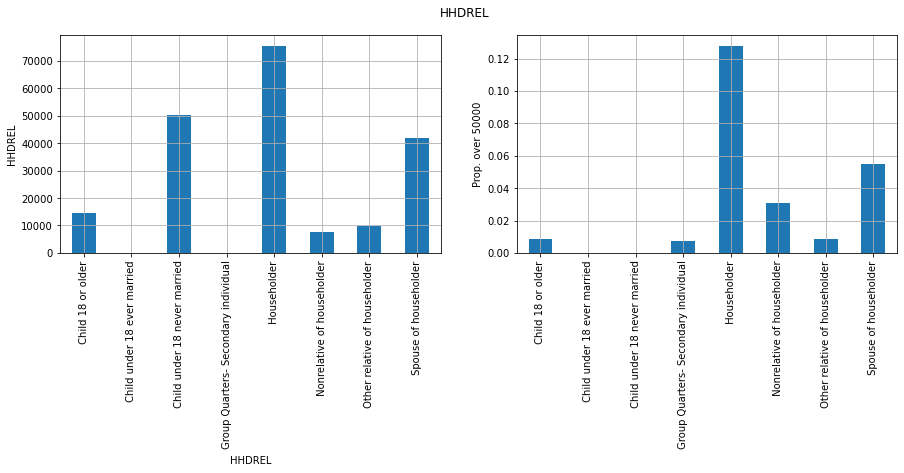

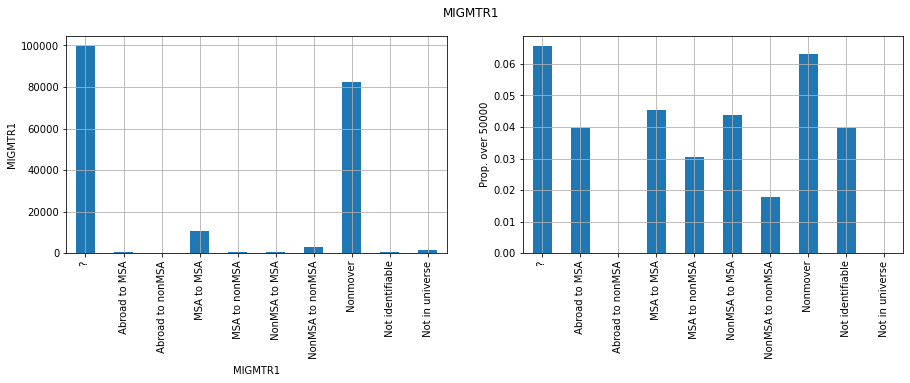

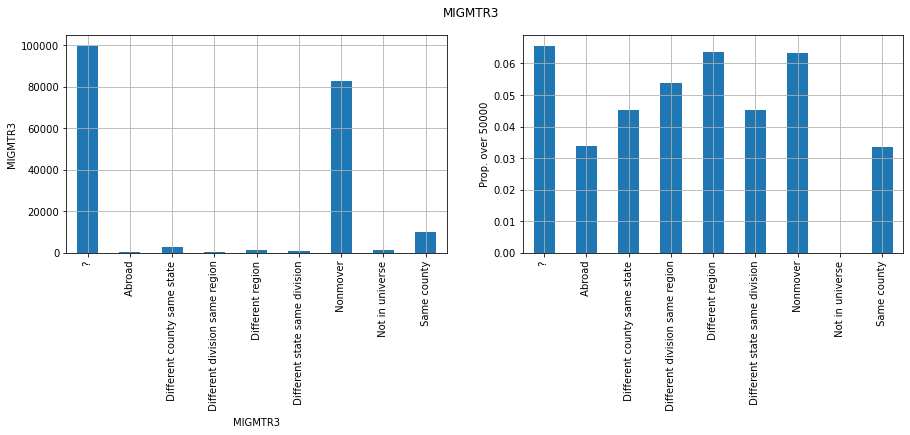

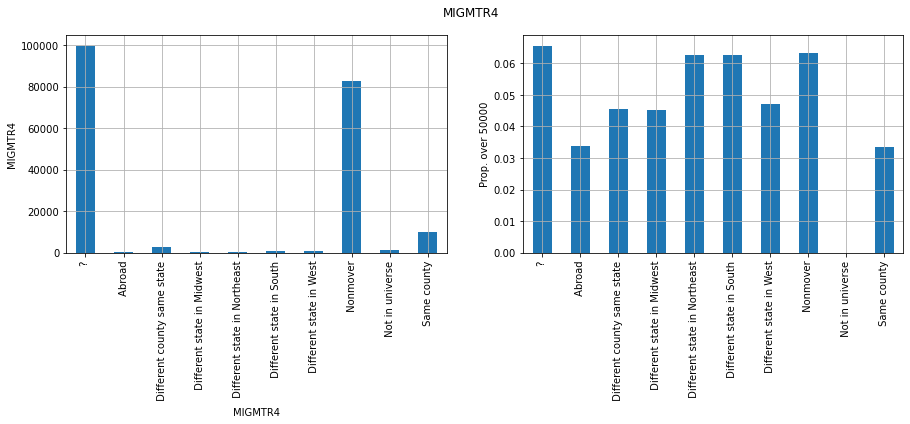

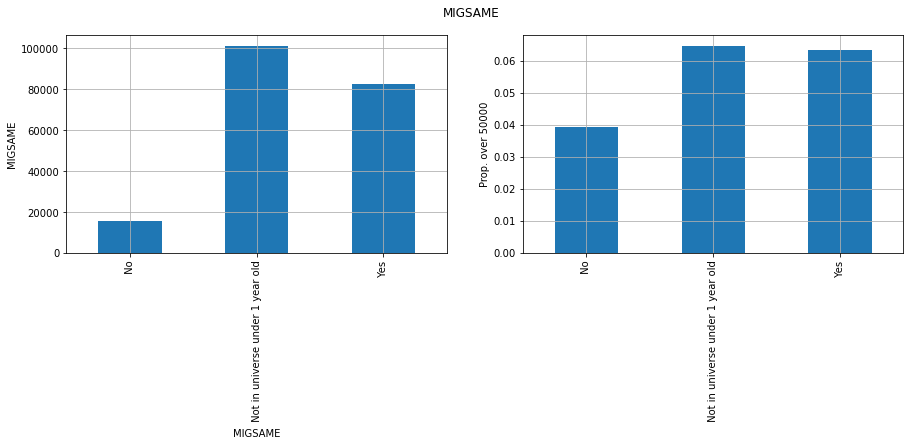

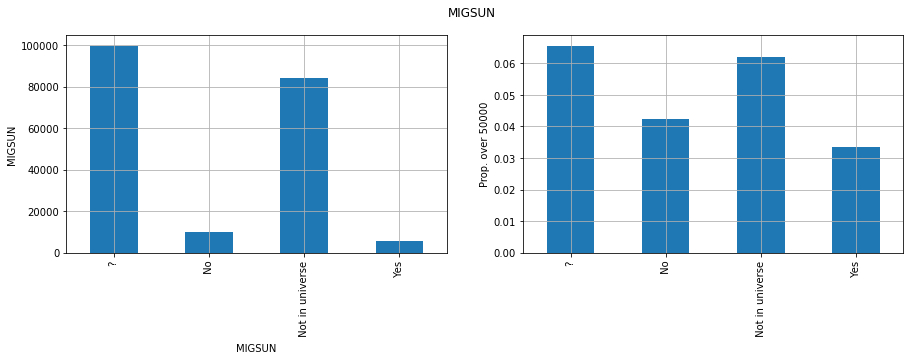

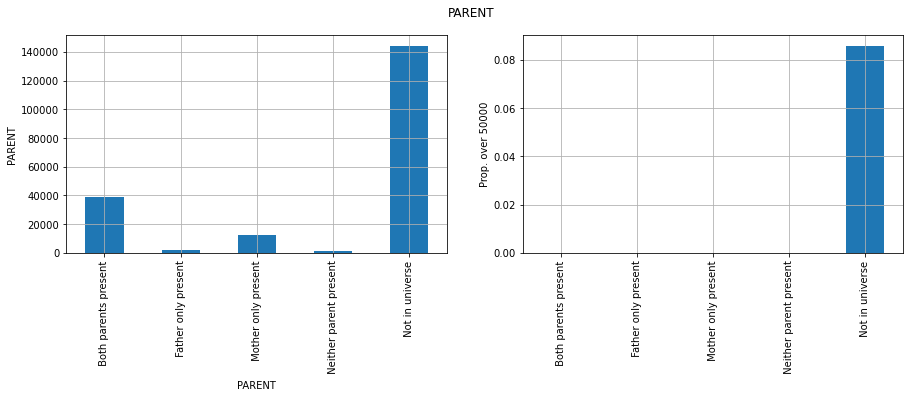

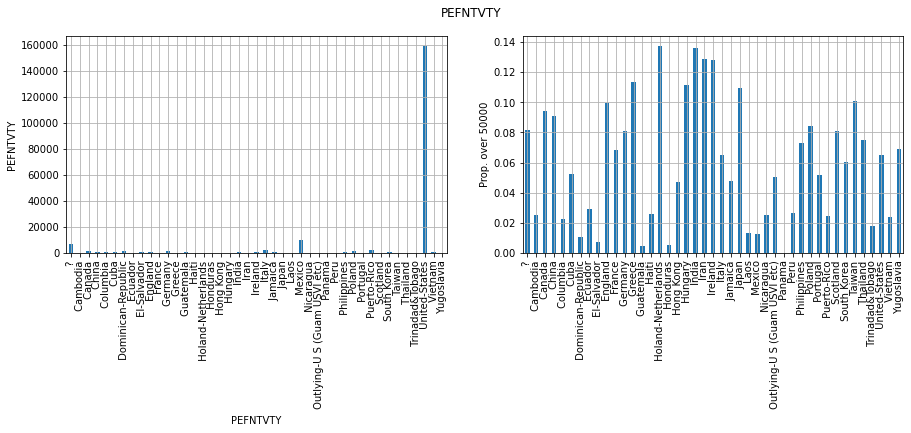

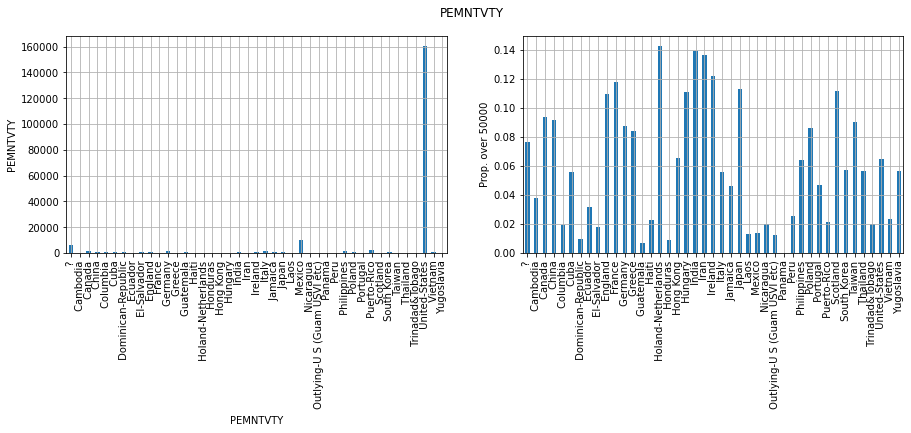

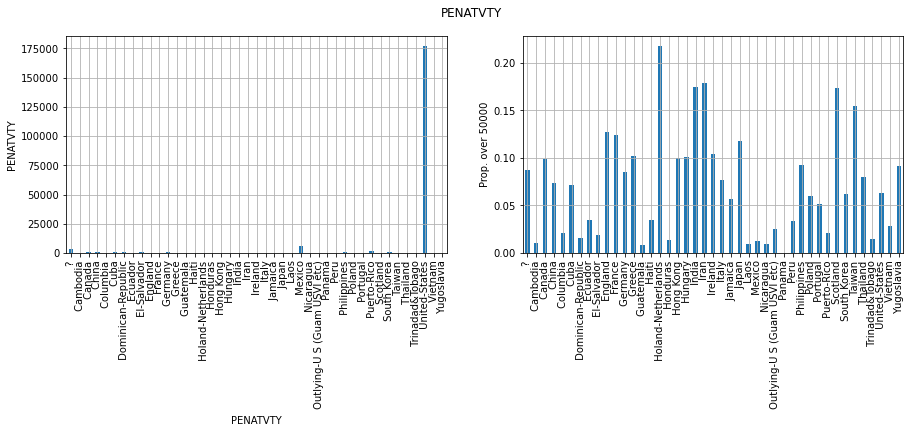

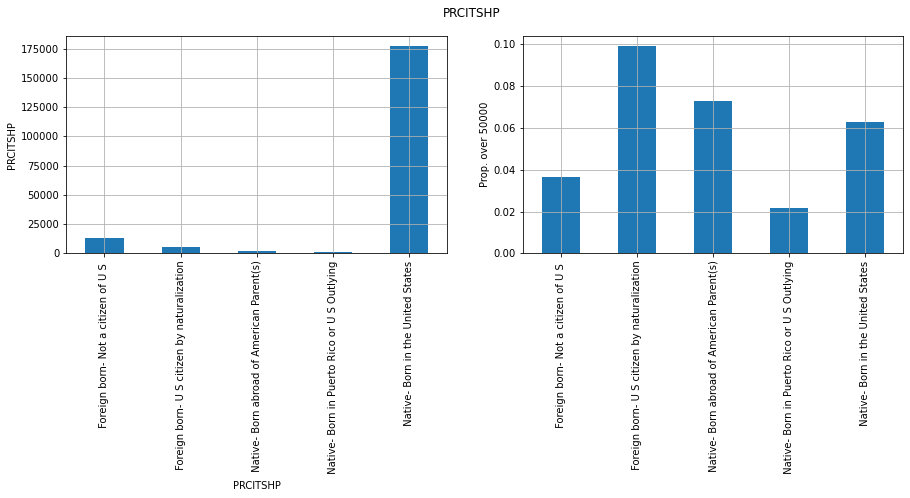

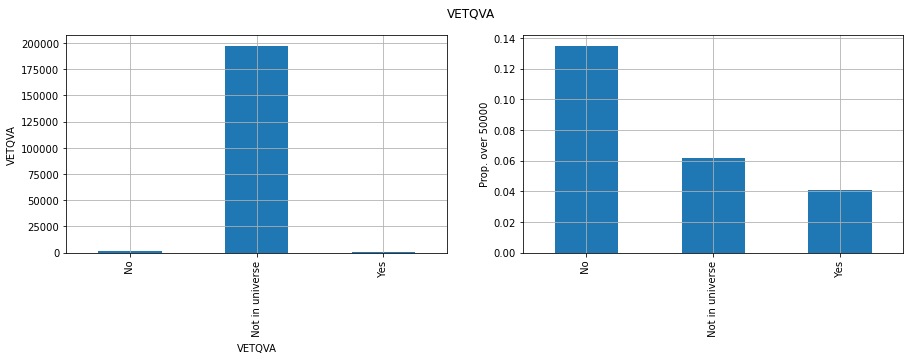

In [10]:
for col in cat_cols:
    if col != 'target':
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,4))
        fig.suptitle(col)
        total1 = train[train['target']==' 50000+.'][col].value_counts().sort_index(ascending = False)
        plt.sca(ax1)
        train.groupby([col]).count()['target'].sort_values(ascending = False).sort_index().plot(kind = 'bar', grid = True)
        ax1.set_ylabel(col)
        plt.sca(ax2)
        (total1/train.groupby([col]).count()['target']).sort_index().plot(kind = 'bar', grid= True)
        ax2.set_ylabel('Prop. over 50000')

* From the plot, we know that people who receive higher education tend to earn more money (annual income > 500000).
* Although female population in the data set is more than male, the proportion of female tend to earn more money (annual income > 500000) is less than that of male.
* Majority of married people tend to earn more money than people who are never married before.
* Large proportion of Asian and white people tend to earn more money (annual income > 500000).

## 2. Data preprocessing

2.1. (8%) Fill missing values (if there are any)

Explore numerical values in the dataset.

In [11]:
for col in num_cols:
    print(train[col].value_counts().keys())

Int64Index([34, 35, 36, 31, 33,  5,  4,  3, 37, 38,  2,  7, 30, 32,  8,  6,  9,
            13, 39,  1, 41, 10, 11, 40, 14, 12, 29, 28, 42, 15, 43, 16, 45,  0,
            46, 47, 23, 44, 25, 24, 17, 27, 26, 22, 18, 19, 48, 20, 21, 51, 50,
            49, 52, 53, 54, 55, 56, 57, 58, 59, 64, 60, 65, 62, 63, 61, 67, 66,
            68, 71, 69, 70, 73, 72, 74, 75, 76, 77, 78, 79, 80, 90, 81, 82, 83,
            84, 85, 86, 87, 88, 89],
           dtype='int64')
Int64Index([ 0, 33, 43,  4, 42, 45, 29, 37, 41, 32, 35, 39, 34, 44,  2, 11, 50,
            40, 47, 38, 24, 12, 19, 30, 31, 25,  9, 22, 36, 13,  1, 48, 27, 49,
             3, 21,  6,  5,  8, 16, 23, 18, 15,  7, 14, 46, 17, 28, 26, 51, 20,
            10],
           dtype='int64')
Int64Index([ 0,  2, 26, 19, 29, 36, 34, 10, 16, 23, 12, 33,  3, 35, 38, 31, 32,
            37,  8, 42, 30, 24, 17, 28, 44, 41, 43,  4, 13, 18, 39, 14,  5, 15,
            27, 25,  9,  7, 11, 40,  1, 21,  6, 22, 45, 20, 46],
           dtype='int64')
Int

In [12]:
for col in cat_cols:
    train[col] = train[col].apply(lambda x: np.nan if 'universe' in str(x) or '?' in str(x) else x)
    test[col] = test[col].apply(lambda x: np.nan if 'universe' in str(x) or '?' in str(x) else x)

In [13]:
cols_to_drop = (train.isnull().sum()/train.shape[0]).sort_values(ascending = False)

In [14]:
cols_to_drop = cols_to_drop[cols_to_drop > 0.6].index

In [15]:
cols_to_drop

Index(['VETQVA', 'AUNTYPE', 'AHSCOL', 'GRINST', 'MIGSUN', 'GRINREG', 'AUNMEM',
       'PARENT'],
      dtype='object')

In [16]:
train.drop(columns = cols_to_drop, inplace = True)
test.drop(columns = cols_to_drop, inplace = True)

User SimpleImputer to fill the missing value.

In [17]:
cat_cols = [col for col in cat_cols if col not in cols_to_drop and col != 'target']
print(cat_cols)

['ACLSWKR', 'AHGA', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP']


In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [19]:
train[cat_cols] = pd.DataFrame(imputer.fit_transform(train[cat_cols]))
test[cat_cols] = pd.DataFrame(imputer.fit_transform(test[cat_cols]))

In [20]:
train.isnull().sum()

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
NOEMP       0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETYN       0
WKSWORK     0
target      0
dtype: int64

In [21]:
test.isnull().sum()

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
NOEMP       0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETYN       0
WKSWORK     0
target      0
dtype: int64

2.2. (9%) Properly encode categorical features. Explain your choice of methods of categorical feature encoding

In [22]:
train['ACLSWKR'].value_counts()

 Private                           172273
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: ACLSWKR, dtype: int64

In [23]:
train['AMJOCC'].value_counts()

 Adm support including clerical           115521
 Professional specialty                    13940
 Executive admin and managerial            12495
 Other service                             12099
 Sales                                     11783
 Precision production craft & repair       10518
 Machine operators assmblrs & inspctrs      6379
 Handlers equip cleaners etc                4127
 Transportation and material moving         4020
 Farming forestry and fishing               3146
 Technicians and related support            3018
 Protective services                        1661
 Private household services                  780
 Armed Forces                                 36
Name: AMJOCC, dtype: int64

We analyze the categorical features and numerical features that share the same characteristics and grouped them into the following categories.
- Education
    - 'AHGA' is an ordinal variable. We will use ordinal encoding for this feature.
    - We already have 'AHGA' for education level of the population, we can drop 'AHSCOL'. This variable is already dropped.

In [24]:
train['AHGA'].value_counts().keys()

Index([' High school graduate', ' Children', ' Some college but no degree',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade', ' 10th grade',
       ' 11th grade', ' Masters degree(MA MS MEng MEd MSW MBA)', ' 9th grade',
       ' Associates degree-occup /vocational',
       ' Associates degree-academic program', ' 5th or 6th grade',
       ' 12th grade no diploma', ' 1st 2nd 3rd or 4th grade',
       ' Prof school degree (MD DDS DVM LLB JD)', ' Doctorate degree(PhD EdD)',
       ' Less than 1st grade'],
      dtype='object')

In [25]:
def map_education(x):
    if x ==' Children' or x == ' Less than 1st grade':
        return 0 
    elif x == ' 1st 2nd 3rd or 4th grade' or x == ' 5th or 6th grade':
        return 1
    elif x == ' 7th and 8th grade' or x == ' 9th grade' or x == ' 10th grade' or x == ' 11th grade' or x == ' 12th grade no diploma':
        return 2
    elif x == ' High school graduate' or x == ' Some college but no degree':
        return 3
    elif x == ' Associates degree-occup /vocational' or x == ' Associates degree-academic program' or x == ' Bachelors degree(BA AB BS)':
        return 4
    elif x == ' Masters degree(MA MS MEng MEd MSW MBA)':
        return 5
    elif x == ' Prof school degree (MD DDS DVM LLB JD)' or x == ' Doctorate degree(PhD EdD)':
        return 6

'Primary School' -> 0
'High School' -> 1
'Graduate' -> 2
'Masters' -> 3
'Phd' -> 4

In [26]:
education_map = train['AHGA'].map(map_education)
education_map.value_counts()

3    76227
0    48241
2    30796
4    29586
5     6541
1     5076
6     3056
Name: AHGA, dtype: int64

In [27]:
train['AHGA'] = train['AHGA'].map(map_education)
test['AHGA'] = test['AHGA'].map(map_education)

- Occupation 
    - 'AMJOCC' refers to people's occupation. We can use one-hot-encoding. 
    -'ACLSWKR'basically encodes the same information as 'AMJOCC' (occupation). Because 'AMJOCC' is more specific than 'ACLSWKR'. We can drop 'ACLSWKR' 
    -'AMJIND' is which industry the population belong to. This basically tells us the same thing as 'AMJOCC' does.
    -  For 'ADTIND'(industry code) and 'AMJOCC' (occupation code), as we don't know what those codes actually refer to, it will be hard for us to draw insights. We decide to drop those two variables.

In [28]:
cols_to_drop1 = ['ADTIND','ACLSWKR', 'AMJIND']
cat_cols = [col for col in cat_cols if col not in cols_to_drop1]
num_cols = [col for col in num_cols if col not in cols_to_drop1]

In [29]:
train.drop(columns = cols_to_drop1, inplace = True)
test.drop(columns = cols_to_drop1, inplace = True)

In [30]:
print(train.shape)
print(test.shape)

(199523, 29)
(99762, 29)


  - Nationality, Migration Status and Country of Origin
    - 'PRCITSHP' basically describes the country of people's origin, we can use one-hot-encoding to transform this variable.
    - For 'PENATVTY', 'PEFNTVTY' and 'PEMNTVTY', these three variables have information that is already included in 'PRCITSHP'.
    - 'MIGMTR1', 'MIGMTR3', 'MIGMTR4' and 'MIGSAME': For these three variables, from the proportion graphs shown above, people who more more than $50000$ a year do not correlate too much with the distribution of the region people who migrated from. We can drop these three variables.
    - For 'AREORGN', as majority of the population comes from the category all others, we can use label encoding to map values that is of Hispanic origin to 1 and all others to 0.

In [31]:
cols_to_drop2 = ['PENATVTY', 'PEFNTVTY', 'PEMNTVTY', 'HHDFMX', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME']
cat_cols = [col for col in cat_cols if col not in cols_to_drop2]
num_cols = [col for col in num_cols if col not in cols_to_drop2]

In [32]:
train.drop(columns = cols_to_drop2, inplace = True)
test.drop(columns = cols_to_drop2, inplace = True)

In [33]:
print(train.shape)
print(test.shape)

(199523, 21)
(99762, 21)


Label Encoding for 'AREORGN'

In [34]:
train['AREORGN'].value_counts().keys()

Index([' All other', ' Mexican-American', ' Mexican (Mexicano)',
       ' Central or South American', ' Puerto Rican', ' Other Spanish',
       ' Cuban', ' NA', ' Do not know', ' Chicano'],
      dtype='object')

In [35]:
origin_map = train['AREORGN'].apply(lambda x: 1 if x == ' All other' else (0 if x == ' NA' else 2))

In [36]:
origin_map.value_counts()

1    171907
2     26742
0       874
Name: AREORGN, dtype: int64

In [37]:
train['AREORGN'] = train['AREORGN'].apply(lambda x: 1 if x == ' All other' else (0 if x == ' NA' else 2))
test['AREORGN'] = test['AREORGN'].apply(lambda x: 1 if x == ' All other' else (0 if x == ' NA' else 2))

In [38]:
train['ARACE'].value_counts()

 White                          167365
 Black                           20415
 Asian or Pacific Islander        5835
 Other                            3657
 Amer Indian Aleut or Eskimo      2251
Name: ARACE, dtype: int64

In [39]:
train['FILESTAT'].value_counts()

 Nonfiler                        75094
 Joint both under 65             67383
 Single                          37421
 Joint both 65+                   8332
 Head of household                7426
 Joint one under 65 & one 65+     3867
Name: FILESTAT, dtype: int64

In [40]:
print(train.shape)
print(test.shape)

(199523, 21)
(99762, 21)


- Micellaneous, Demographic
   - 'ASEX', we can apply one-hot encoding as we have gender-1 (male), gender-2 (female) and gender-3 ( unknown).
   - 'AMARITAL', we can apply one-hot encoding, for this variable.
   - 'ARACE' We can put 'Amer Indian Aleut or Eskimo' into 'Other' as they are minority of the whole population.
   - 'FIESTAT' We can use one-hot encoding. After that, we will perform feature selection to decide whether we should drop this variable.
   - 'AWKSTAT' We will use one-hot encoding for this one and feature selection to decide whether we should drop this variable.
   - 'HHDREL' We can apply one-hot encoding to label this variable.
   - 'HHDFMX' This information is already encoded in 'HHDREL' we can drop this variable.

In [41]:
train.columns

Index(['AAGE', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AMARITL', 'AMJOCC', 'ARACE',
       'AREORGN', 'ASEX', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL',
       'FILESTAT', 'HHDREL', 'NOEMP', 'PRCITSHP', 'SEOTR', 'VETYN', 'WKSWORK',
       'target'],
      dtype='object')

In [42]:
one_hot_encoder_cols = ['AMJOCC', 'PRCITSHP', 'ASEX', 'AMARITL', 'ARACE', 'FILESTAT', 'AWKSTAT', 'HHDREL']
df_one_hot_encoder_train = pd.get_dummies(train[one_hot_encoder_cols], dummy_na=False)
df_one_hot_encoder_test = pd.get_dummies(test[one_hot_encoder_cols], dummy_na = False)

In [43]:
df_one_hot_encoder_train.shape

(199523, 55)

In [44]:
df_one_hot_encoder_test.shape

(99762, 55)

In [45]:
train = pd.concat([train, df_one_hot_encoder_train], axis = 1)
test = pd.concat([test, df_one_hot_encoder_test], axis = 1)

In [46]:
train.drop(columns = one_hot_encoder_cols, inplace = True)
test.drop(columns = one_hot_encoder_cols, inplace = True)

In [47]:
print(train.shape)
print(test.shape)

(199523, 68)
(99762, 68)


In [48]:
train.columns

Index(['AAGE', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AREORGN', 'CAPGAIN', 'CAPLOSS',
       'DIVVAL', 'NOEMP', 'SEOTR', 'VETYN', 'WKSWORK', 'target',
       'AMJOCC_ Adm support including clerical', 'AMJOCC_ Armed Forces',
       'AMJOCC_ Executive admin and managerial',
       'AMJOCC_ Farming forestry and fishing',
       'AMJOCC_ Handlers equip cleaners etc ',
       'AMJOCC_ Machine operators assmblrs & inspctrs',
       'AMJOCC_ Other service', 'AMJOCC_ Precision production craft & repair',
       'AMJOCC_ Private household services', 'AMJOCC_ Professional specialty',
       'AMJOCC_ Protective services', 'AMJOCC_ Sales',
       'AMJOCC_ Technicians and related support',
       'AMJOCC_ Transportation and material moving',
       'PRCITSHP_ Foreign born- Not a citizen of U S ',
       'PRCITSHP_ Foreign born- U S citizen by naturalization',
       'PRCITSHP_ Native- Born abroad of American Parent(s)',
       'PRCITSHP_ Native- Born in Puerto Rico or U S Outlying',
       'PRCITSHP_ Native

'target' variable and 'WKSWORK'

In [49]:
train['target'] = train['target'].apply(lambda x: 1 if x == ' 50000+.' else 0)

In [50]:
test['target'] = test['target'].apply(lambda x: 1 if x == ' 50000+.' else 0)

Normalize numerical values.

In [51]:
num_cols

['AAGE',
 'ADTOCC',
 'AHRSPAY',
 'CAPGAIN',
 'CAPLOSS',
 'DIVVAL',
 'NOEMP',
 'SEOTR',
 'VETYN',
 'WKSWORK']

In [52]:
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.fit_transform(test[num_cols])

In [53]:
train.shape

(199523, 68)

In [54]:
test.shape

(99762, 68)

In [55]:
non_target_cols = [index for index in train.columns if str(index) != 'target']

In [56]:
X = train[non_target_cols]
y = train['target']

In [57]:
train['target']

0         0
1         0
2         0
3         0
4         1
         ..
199518    0
199519    0
199520    1
199521    0
199522    0
Name: target, Length: 199523, dtype: int64

Feature Engineering (1.3)

In [58]:
from sklearn.model_selection import StratifiedKFold
kf2 = StratifiedKFold(n_splits = 5, random_state = 13, shuffle = True)
feature_importances = []
for train_index, val_index in kf2.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    feature_importances.append(model.coef_.flatten())

In [59]:
feature_importances

[array([ 0.71665816, -0.76730593,  0.70457496, -0.00800959, -0.39815868,
         0.45604264,  0.16187413,  0.37717752,  0.33828392, -0.03429917,
        -0.31921959,  1.02069035, -1.07193693,  0.77637861, -0.35365039,
         0.6047082 , -0.16784363, -0.12470966, -1.17757283,  0.32346013,
        -0.61210877, -0.53574019,  0.29660639, -0.0385328 , -0.5689333 ,
         0.16958615, -0.56360316, -0.35490125, -0.41001584, -0.6832394 ,
        -0.46852936, -1.89128655, -0.58900246, -0.17287286, -1.0159828 ,
        -0.39790178, -0.07930644, -0.44413585, -0.26316559, -0.10692369,
        -0.94411593, -0.28687525, -0.58726524, -0.42974047, -0.2322921 ,
         0.13458433, -0.44281076,  0.18092168, -0.42433816, -1.77412015,
        -0.15452595, -0.31523989, -0.13808691, -0.28131621, -0.16736571,
        -0.24055381, -0.18258918, -0.21809783, -0.93703946, -1.05574785,
        -0.00785447, -0.93577636, -0.12680505,  0.21992198, -0.30070823,
        -0.50061857,  0.22729955]),
 array([ 0.6891

In [60]:
df_importances = pd.DataFrame(np.transpose(feature_importances), columns = ['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5'])
df_importances.index = X.columns
df_importances

,fold_1,fold_2,fold_3,fold_4,fold_5
AAGE,0.716658,0.689130,0.709273,0.703921,0.714186
ADTOCC,-0.767306,-0.767368,-0.757532,-0.727512,-0.765785
AHGA,0.704575,0.680656,0.676714,0.672633,0.682466
AHRSPAY,-0.008010,0.003845,0.009751,-0.004103,0.002126
AREORGN,-0.398159,-0.454349,-0.380860,-0.413429,-0.360929
...,...,...,...,...,...
HHDREL_ Group Quarters- Secondary individual,-0.126805,-0.128832,-0.187084,-0.084681,-0.081783
HHDREL_ Householder,0.219922,0.178294,0.241567,0.192095,0.161491
HHDREL_ Nonrelative of householder,-0.300708,-0.202093,-0.202479,-0.282175,-0.303555
HHDREL_ Other relative of householder,-0.500619,-0.385627,-0.520084,-0.584056,-0.495739


In [61]:
df_importances['abs_mean'] = np.abs(df_importances.mean(axis = 1))
df_importances.sort_values(by = 'abs_mean', ascending = False)

,fold_1,fold_2,fold_3,fold_4,fold_5,abs_mean
ASEX_ Female,-1.891287,-1.837760,-1.826998,-1.839756,-1.850024,1.849165
FILESTAT_ Nonfiler,-1.774120,-1.591001,-1.617938,-1.816243,-1.623743,1.684609
AMJOCC_ Other service,-1.177573,-1.195097,-1.198083,-1.201942,-1.178950,1.190329
AMJOCC_ Adm support including clerical,-1.071937,-1.055672,-1.009825,-1.020475,-1.040220,1.039626
WKSWORK,1.020690,1.045639,1.053849,1.001252,1.049663,1.034219
...,...,...,...,...,...,...
FILESTAT_ Head of household,0.134584,0.139293,0.052718,0.097245,0.016180,0.088004
SEOTR,-0.034299,-0.027556,-0.030394,-0.035194,-0.026273,0.030743
AMJOCC_ Sales,-0.038533,-0.022891,0.014547,0.015409,-0.034921,0.013278
HHDREL_ Child under 18 ever married,-0.007854,-0.009597,-0.006015,-0.004551,-0.008220,0.007248


As we can see from the df_importances, the absolute mean for 'AHSPAY', 'HHDREL_ Child under 18 ever married' and 'AMJOCC_ Sales' are below 0.02. We can drop those variables.

In [62]:
df_importances.index

Index(['AAGE', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AREORGN', 'CAPGAIN', 'CAPLOSS',
       'DIVVAL', 'NOEMP', 'SEOTR', 'VETYN', 'WKSWORK',
       'AMJOCC_ Adm support including clerical', 'AMJOCC_ Armed Forces',
       'AMJOCC_ Executive admin and managerial',
       'AMJOCC_ Farming forestry and fishing',
       'AMJOCC_ Handlers equip cleaners etc ',
       'AMJOCC_ Machine operators assmblrs & inspctrs',
       'AMJOCC_ Other service', 'AMJOCC_ Precision production craft & repair',
       'AMJOCC_ Private household services', 'AMJOCC_ Professional specialty',
       'AMJOCC_ Protective services', 'AMJOCC_ Sales',
       'AMJOCC_ Technicians and related support',
       'AMJOCC_ Transportation and material moving',
       'PRCITSHP_ Foreign born- Not a citizen of U S ',
       'PRCITSHP_ Foreign born- U S citizen by naturalization',
       'PRCITSHP_ Native- Born abroad of American Parent(s)',
       'PRCITSHP_ Native- Born in Puerto Rico or U S Outlying',
       'PRCITSHP_ Native- Born in 

In [63]:
cols_to_drop3 = ['AHRSPAY', 'HHDREL_ Child under 18 never married', 'AMJOCC_ Sales']

In [64]:
train.drop(columns = cols_to_drop3, inplace = True)
test.drop(columns = cols_to_drop3, inplace = True)

In [65]:
print(train.shape)
print(test.shape)

(199523, 65)
(99762, 65)


2.3. (8%) Cluster observations and add cluster number as one of the features. Make sure that the clustering method has a good quality

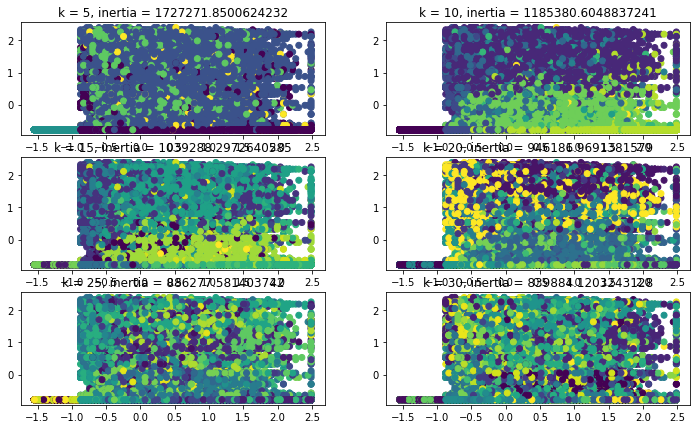

In [69]:
from sklearn.cluster import KMeans
inertia_values = []
k_values = []
plt.figure(figsize=(12, 12))
for k in range(5, 31, 5):
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(X.values)
    clusters = k_means.predict(X.values)
    plt.subplot(5, 2, k//5)
    plt.scatter(X.values[:,0], X.values[:,1], c=clusters)
    plt.title('k = {}, inertia = {}'.format(k, k_means.inertia_))
    inertia_values.append(k_means.inertia_)
    k_values.append(k)
plt.show()

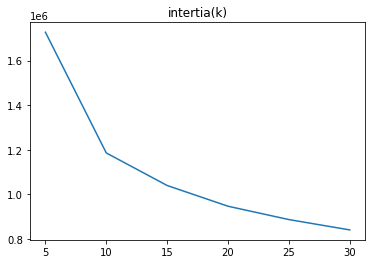

In [70]:
plt.plot(k_values, inertia_values)
plt.title('intertia(k)')
plt.show()

From the plot, we can choose k to be 10 based on the 'elbow rule'

In [71]:
non_target_cols = [index for index in train.columns if str(index) != 'target']
X = train[non_target_cols]
y = train['target']
print(X.shape, y.shape)

(199523, 64) (199523,)


In [72]:
X_test = test[non_target_cols]
y_test = test['target']
print(X_test.shape, y_test.shape)

(99762, 64) (99762,)


In [74]:
k_means = KMeans(n_clusters=10)
k_means = k_means.fit(X.values)
clusters = k_means.labels_

X['cluster_number'] = clusters
X['cluster_number'].value_counts()

0    47437
3    33906
5    30214
1    25779
2    23585
7    18381
4    15821
9     3774
6      375
8      251
Name: cluster_number, dtype: int64

In [76]:
k_means_test = KMeans(n_clusters=10)
k_means_test = k_means_test.fit(X_test.values)
clusters = k_means_test.labels_

X_test['cluster_number'] = clusters
X_test['cluster_number'].value_counts()

0    23450
3    17469
4    15164
2    12779
9    11688
1     8964
5     8054
7     1832
6      183
8      179
Name: cluster_number, dtype: int64

In [77]:
print(X.shape)
print(X_test.shape)

(199523, 65)
(99762, 65)


## 3. Model training

3.1. (8%) Apply different techniques which can help to work with imbalanced data. You are supposed to try at least 2 techniques (in the end, you don't have to include them into your final pipeline - but you should explain why)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, matthews_corrcoef, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


from imblearn.under_sampling import NearMiss, RandomUnderSampler, TomekLinks

In [79]:
def compute_metrics(y_test, y_pred):
    print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred)))
    print('F-score: {:.5f}'.format(f1_score(y_test, y_pred)))
    print('Precision: {:.5f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.5f}'.format(recall_score(y_test, y_pred)))
    print('Accuracy (balanced): {:.5f}'.format(balanced_accuracy_score(y_test, y_pred)))
    print('MCC: {:.5f}'.format(matthews_corrcoef(y_test, y_pred)))

In [80]:
def compute_confusion_matrix(y_test, y_pred):
    compute_metrics(y_test, y_pred)
    return pd.DataFrame(
        confusion_matrix(y_test, y_pred, labels=[1, 0]),
        columns=['a(x) = 1', 'a(x) = 0'],
        index=['y = 1', 'y = 0'],
    ).T

#method 1 undersampling method 2 Stratified Kfold method 3 balanced RamdomForestClassifier

In [81]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 13, stratify = y)

In [82]:
rus = RandomUnderSampler(random_state = 13)
X_res, y_res = rus.fit_sample(X_train, y_train)
clf = RandomForestClassifier(n_estimators = 50, class_weight = 'balanced', random_state = 13)
clf.fit(X_res, y_res)
y_pred_val = clf.predict(X_val)
compute_confusion_matrix(y_val, y_pred_val)

Accuracy: 0.84884
F-score: 0.42000
Precision: 0.27565
Recall: 0.88178
Accuracy (balanced): 0.86422
MCC: 0.44059


,y = 1,y = 0
a(x) = 1,2730,7174
a(x) = 0,366,39611


Because the number of y = 0 is much larger than the number of y = 1, we use F-score and MCC as the metric to measure the model performance. In this case, F-score and MCC is about 44%.

3.2 Train different machine learning models, including the advanced boosting algorithms studied during the course. Carefully tune hyperparameters of the algorithms. You are supposed to compare at least 3 models

Model 1: Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [84]:
params_grid = {
    'max_depth': [6,8],
    'learning_rate': [0.1],
}

grid_boost_grad = GridSearchCV(GradientBoostingClassifier(), param_grid = params_grid, cv = 5, scoring = 'f1')
grid_boost_grad.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 8]},
             scoring='f1')

In [85]:
grid_boost_grad.best_score_

0.5687552606984068

Model 2: XGBoost

In [87]:
grid_boost_xgb = XGBClassifier(max_depth = 6)
grid_boost_xgb.fit(X_train, y_train)

[00:12:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
y_val_predict_xgb = grid_boost_xgb.predict(X_val)
compute_confusion_matrix(y_val, y_val_predict_xgb)

Accuracy: 0.95760
F-score: 0.58011
Precision: 0.75270
Recall: 0.47190
Accuracy (balanced): 0.73082
MCC: 0.57596


,y = 1,y = 0
a(x) = 1,1461,480
a(x) = 0,1635,46305


Model 3: LightGBM

In [89]:
grid_boost_light = LGBMClassifier(num_leaves = 8, max_depth = 4)
grid_boost_light.fit(X_train, y_train)

LGBMClassifier(max_depth=4, num_leaves=8)

In [90]:
y_val_predict_light = grid_boost_light.predict(X_val)
compute_confusion_matrix(y_val, y_val_predict_light)

Accuracy: 0.95638
F-score: 0.55134
Precision: 0.76226
Recall: 0.43185
Accuracy (balanced): 0.71147
MCC: 0.55401


,y = 1,y = 0
a(x) = 1,1337,417
a(x) = 0,1759,46368


Blending

In [91]:
grad_val_predict = grid_boost_grad.predict(X_val)
xgb_val_predict = grid_boost_xgb.predict(X_val)
lgb_val_predict = grid_boost_light.predict(X_val)

In [92]:
X_val_blend = pd.DataFrame({'xgb': xgb_val_predict, 'lgb': lgb_val_predict,'grad': grad_val_predict})
X_val_blend

,xgb,lgb,grad
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
49876,0,0,0
49877,0,0,0
49878,0,0,0
49879,0,0,0


In [93]:
X_val_blend['grad'].value_counts()

0    47861
1     2020
Name: grad, dtype: int64

In [115]:
w1_best = 0
w2_best = 0
w3_best = 0

best_f1 = float('inf')
for w1 in np.linspace(0, 0.4, 10):
    for w2 in np.linspace(0, 0.4, 10):
        for w3 in np.linspace(0, 0.2, 10):
            if w1 + w2 + w3 == 1:
                value = X_val_blend['xgb']*w1 + X_val_blend['lgb']*w2 + X_val_blend['grad']*w3
                predict = [1 if val > 0.5 else 0 for val in value]
                f1 =f1_score(y_val, predict)
                if f1 < best_f1:
                    best_f1 = best_f1
                    w1_best = w1
                    w2_best = w2
                    w3_best = w3

In [116]:
w1_best

0.4

In [117]:
w2_best

0.4

In [118]:
w3_best

0.2

In [119]:
w1_best = 0.4
w2_best = 0.4
w3_best = 0.2

In [120]:
X_test.shape

(99762, 65)

In [121]:
X_train.shape

(149642, 65)

## Summary

* 4.1. (8%) Estimate the quality of the models and their ensemble on the test set. Describe the results. Which model is the best?
* 4.3. (9%) Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

In [122]:
grad_test_predict = grid_boost_grad.predict(X_test)
print(f1_score(grad_test_predict, y_test))
xgb_test_predict = grid_boost_xgb.predict(X_test)
print(f1_score(xgb_test_predict, y_test))
lgb_test_predict = grid_boost_light.predict(X_test)
print(f1_score(lgb_test_predict, y_test))

0.5155564419625049
0.5335323383084577
0.5102539581340985


In [128]:
print(matthews_corrcoef(grad_test_predict, y_test))
print(matthews_corrcoef(xgb_test_predict, y_test))
print(matthews_corrcoef(lgb_test_predict, y_test))

0.5068910661169432
0.525888944449805
0.5172390177088504


In [123]:
X_val_blend_test = pd.DataFrame({'xgb': xgb_test_predict, 'lgb': lgb_test_predict,'grad': grad_test_predict})
X_val_blend_test

,xgb,lgb,grad
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
99757,0,0,0
99758,0,0,0
99759,0,0,0
99760,0,0,0


In [126]:
y_predict_test = X_val_blend_test['xgb']*w1_best+X_val_blend_test['lgb']*w2_best + X_val_blend_test['grad']*w3_best
y_predict_test = [1 if val > 0.5 else 0 for val in y_predict_test]

In [127]:
print(f1_score(y_predict_test, y_test))

0.5271001326936818


* 4.2. (8%) Interpret the best single model and the ensemble. Use at least 2 model interpretation techniques. Explain, why your models have good quality (or bad quality)

XGB model works best because it has highest f1-score and MCC score. XGB model repetitively makes use of residuals. It has advantages of randomForestClassifer and GradientBoosting.

The result for lightGBM is close to XGB model. For better performance of lightGBM model, we should use more time and resource (for example, GPU) to tune the hyperparameters of this model using GridSearchCV.

Ensembling method (blending) basically takes advantage of all three models to have improved results. 

* 4.3 Summarize your results and write a conclusion. What have you found in the data, which techniques did you use? Which methods and models worked best in your task? Can you explain in simple words why should we trust your final model?

To summarize our result, we performed feature importance by using KFold (stratified to keep the distribution of the target variable in our training and validation data set). We found that top 3 important features are AAGE(age), ADTOCC(occupation code), AHGA(education_level). The higher the education, the more money people will make. 

Then we developed our baseline model using RandomForesstClassifier and undersampling to analyze imbalanced data. In this case, we take out some samples from the majority class where people's income is less than $50000$. We also used stratified test_train_data splitting to maintain the distribution of the imbalanced variable in the training and validation set. We found that XGB model works best in this case, it improved the baseline by 10%. 

For feature engineering part, we used ordinal encoding for the education variable and label encoding. More importantly, we use one-hot-encoding to make categorical variable more expressive. We perform our training and validation part separately to avoid data leakage. 